In [7]:
from brainscapes import parcellations, atlases, spaces, features, logger
from nilearn import plotting

In [10]:
atlas = atlases.MULTILEVEL_HUMAN_ATLAS
atlas.select_parcellation(parcellations.JULICH_BRAIN_PROBABILISTIC_CYTOARCHITECTONIC_ATLAS)
#print(atlas.regiontree)

left hemisphere
right hemisphere


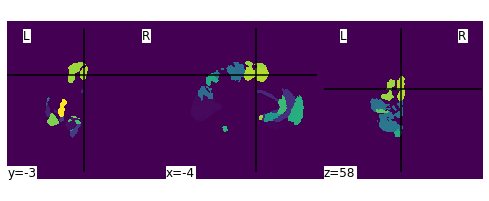

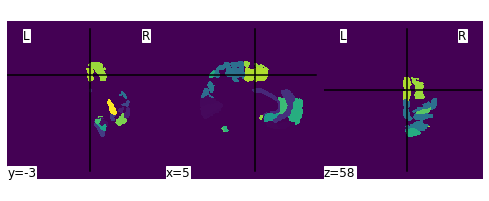

In [11]:
icbm_mri = atlas.get_template(spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)
icbm_maps = atlas.get_maps(spaces.MNI_COLIN_27)
for name,nib in icbm_maps.items():
    print(name)
    plotting.plot_img(nib)

In [12]:
atlas.select_region(atlas.regionnames.AREA_HOC1__V1__17__CALCS____LEFT_HEMISPHERE)
print(atlas.selected_region)

Area hOc1 (V1, 17, CalcS) - left hemisphere


In [13]:
gexs = atlas.query_data(
    modality=features.modalities.GeneExpression,
    gene=features.gene_names.GABARAPL2)
for gex in gexs:
    print(gex)

At (  -7, -75,   9)    race:Hispani  gender:F           age:49      Expression: [10.1,13.2] Z-score: [-0.5,-0.4]
At (  -6, -86,  10)    race:Hispani  gender:F           age:49      Expression: [10.1,13.2] Z-score: [-0.7,-0.4]
At (  -7, -86,  10)    race:Hispani  gender:F           age:49      Expression: [10.0,13.1] Z-score: [-0.8,-0.8]
At (  -7, -85,  -1)    race:Hispani  gender:F           age:49      Expression: [10.2,13.2] Z-score: [-0.4,-0.5]
At (  -6, -94,   5)    race:Hispani  gender:F           age:49      Expression: [10.1,13.3] Z-score: [-0.7,-0.0]
At (  -3, -68,   3)    race:Hispani  gender:F           age:49      Expression: [10.3,13.5] Z-score: [-0.1, 0.4]
At (  -3, -80,  10)    race:White o  gender:M           age:31      Expression: [10.0,13.2] Z-score: [ 0.3, 0.6]
At (  -2, -92,   4)    race:White o  gender:M           age:31      Expression: [ 9.8,12.8] Z-score: [-0.1,-0.4]
At (  -7, -99,   2)    race:White o  gender:M           age:31      Expression: [ 9.8,13.1] Z-sc

In [6]:
for region in atlas.regiontree.leaves:
    atlas.select_region(region)
    props = atlas.regionprops(spaces.MNI_152_ICBM_2009C_NONLINEAR_ASYMMETRIC)

INFO:root:Selected region Ch 123 (Basal Forebrain) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Ch 123 (Basal Forebrain) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Ch 4 (Basal Forebrain) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Ch 4 (Basal Forebrain) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Ch 123 (Basal Forebrain) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
I

INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area OP2 (POperc) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area OP4 (POperc) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area OP4 (POperc) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area OP3 (POperc) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area OP3 (POperc) - right hemisphere
pixdim[0] (

INFO:root:Selected region Area hIP7 (IPS) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area hIP7 (IPS) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area hIP1 (IPS) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area hIP1 (IPS) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area hIP6 (IPS) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) shoul

INFO:root:Selected region Area ifs2 (IFS) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area ifs2 (IFS) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area ifs3 (IFS) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area ifs3 (IFS) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area 44 (IFG) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should 

INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area Fo7 (OFC) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area Fo7 (OFC) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area Fo4 (OFC) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area Fo4 (OFC) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area Fo6 (OFC) - left hemisphere
pixdim[0] (qfac) should be 

INFO:root:Selected region Area FG3 (FusG) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area FG2 (FusG) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area FG2 (FusG) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area p24c (pACC) - left hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:root:Selected region Area p24c (pACC) - right hemisphere
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) sh

KeyboardInterrupt: 

In [ ]:
import nibabel as nib

In [ ]:
nib.imageglobals.logger